## ForestPlot

In [1]:
library(dplyr)
library(arrow)
library(forestploter)
Cox_compared_df <- arrow::read_feather("Cox_compared_df.feather")
Cox_compared_df[1, 1:8]


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘arrow’


The following object is masked from ‘package:utils’:

    timestamp




Subgroup,HR (95% CI) RF + PRS + Prot + Meta + SomaRF ALL,HR RF + PRS + Prot + Meta + SomaRF ALL,HR_UCI RF + PRS + Prot + Meta + SomaRF ALL,HR_LCI RF + PRS + Prot + Meta + SomaRF ALL,n_case RF + PRS + Prot + Meta + SomaRF ALL,n_control RF + PRS + Prot + Meta + SomaRF ALL,c_index RF + PRS + Prot + Meta + SomaRF ALL
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ALL,1.84 (1.73-1.95),1.835319,1.950415,1.727014,516,8196,0.7235439


In [2]:
HR_str_cols <- c()
HR_cols <- c()
HR_UCI_cols <- c()
HR_LCI_cols <- c()
n_case_cols <- c()
n_control_cols <- c()

for (col in colnames(Cox_compared_df)) {
  # 查找包含"(95% CI)"的列名
  if (grepl("(95% CI)", col)) {
    HR_str_cols <- c(HR_str_cols, col)
  }
  # 查找包含"HR"但不包含"(95% CI)"、"HR_UCI"、"HR_LCI"的列名
  if (grepl("HR", col) && !grepl("(95% CI)", col) && !grepl("HR_UCI", col) && !grepl("HR_LCI", col)) {
    HR_cols <- c(HR_cols, col)
  }
  # 查找包含"HR_UCI"的列名
  if (grepl("HR_UCI", col)) {
    HR_UCI_cols <- c(HR_UCI_cols, col)
  }
  # 查找包含"HR_LCI"的列名
  if (grepl("HR_LCI", col)) {
    HR_LCI_cols <- c(HR_LCI_cols, col)
  }
  # 查找包含"n_cases"的列名
  if (grepl("n_case", col)) {
    n_case_cols <- c(n_case_cols, col)
  }
  if (grepl("n_control", col)) {
    n_control_cols <- c(n_control_cols, col)
  }
}

# 打印结果
print("HR (95% CI) columns:")
print(HR_str_cols)
print("HR columns:")
print(HR_cols)
print("HR Upper Confidence Interval (UCI) columns:")
print(HR_UCI_cols)
print("HR Lower Confidence Interval (LCI) columns:")
print(HR_LCI_cols)
print("Number of cases columns:")
print(n_case_cols)

[1] "HR (95% CI) columns:"
[1] "HR (95% CI) RF + PRS + Prot + Meta + SomaRF ALL"
[2] "HR (95% CI) PRS ALL"                            
[3] "HR (95% CI) RF ALL"                             
[4] "HR (95% CI) Prot ALL"                           
[5] "HR (95% CI) Meta ALL"                           
[6] "HR (95% CI) SomtRF ALL"                         
[1] "HR columns:"
[1] "HR RF + PRS + Prot + Meta + SomaRF ALL"
[2] "HR PRS ALL"                            
[3] "HR RF ALL"                             
[4] "HR Prot ALL"                           
[5] "HR Meta ALL"                           
[6] "HR SomtRF ALL"                         
[1] "HR Upper Confidence Interval (UCI) columns:"
[1] "HR_UCI RF + PRS + Prot + Meta + SomaRF ALL"
[2] "HR_UCI PRS ALL"                            
[3] "HR_UCI RF ALL"                             
[4] "HR_UCI Prot ALL"                           
[5] "HR_UCI Meta ALL"                           
[6] "HR_UCI SomtRF ALL"                         
[1] "HR Lower Con

In [3]:
plt_data

ERROR: Error in eval(expr, envir, enclos): object 'plt_data' not found


In [ ]:
library(export)
out_img <- function(x,filename,pic_width=5,pic_height=7){
  graph2eps(x=x,file=paste0(filename,".eps"),width=pic_width,height=pic_height)
  graph2pdf(x=x,file=paste0(filename,".pdf"),width=pic_width,height=pic_height)
  graph2svg(x=x,file=paste0(filename,".svg"),width=pic_width,height=pic_height)
  graph2ppt(x=x,file=paste0(filename,".pptx"),width=pic_width,height=pic_height)
  graph2png(x=x,file=paste0(filename,".png"),width=pic_width,height=pic_height)

}

In [4]:
unlist(strsplit(HR_cols[1], "HR")[1])[2]

[1] " RF + PRS + Prot + Meta + SomaRF ALL"

refline_lwd, refline_lty, refline_col will be deprecated, use refline_gp instead.

footnote_cex, footnote_fontface, footnote_col will be deprecated, use footnote_gp instead.



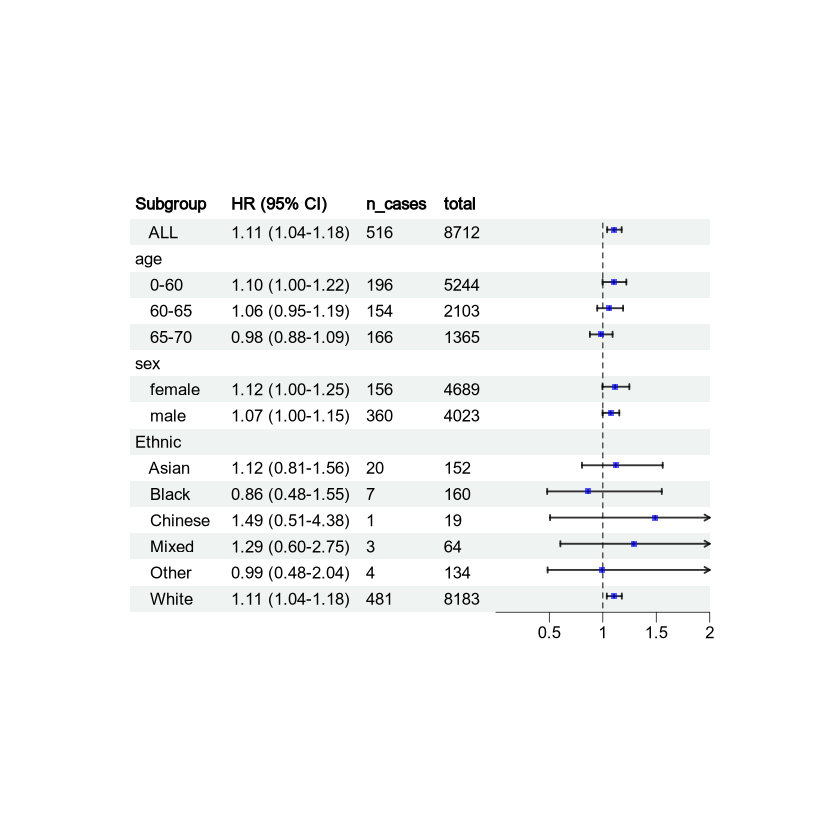

In [6]:
idx = 6
name = unlist(strsplit(HR_cols[idx], "HR")[1])[2]

plt_data<- Cox_compared_df[,c("Subgroup", HR_cols[idx], HR_str_cols[idx], HR_UCI_cols[idx], HR_LCI_cols[idx], n_case_cols[idx], n_control_cols[idx])]
colnames(plt_data) <- c("Subgroup", "HR","HR (95% CI)", "HR_UCI", "HR_LCI", "n_cases", "n_control")
plt_data$` ` <-  paste(rep(" ", 20), collapse = " ")
plt_data$total <- plt_data$n_cases + plt_data$n_control


plt_data$Subgroup <- ifelse(is.na(plt_data$`HR (95% CI)`), 
                      plt_data$Subgroup,
                      paste0("   ", plt_data$Subgroup))

to_replace_na_cols <- c("HR (95% CI)", "n_cases", "total")
# 循环遍历这些列
for (col in to_replace_na_cols) {
  # 检查Cox_compared_df的列名中是否包含指定的列名
  if (col %in% names(plt_data)) {
    # 使用ifelse和is.na来替换NA值为""
    plt_data[[col]] <- ifelse(is.na(plt_data[[col]]), "", plt_data[[col]])
  } else {
    warning(paste("Column", col, "not found in DataFrame."))
  }
}


tm <- forest_theme(base_size = 10,  #文本的大小
                   # Confidence interval point shape, line type/color/width
                   ci_pch = 15,   # 可信区间点的形状
                  #  ci_col = "#762a83",    # CI的颜色
                   ci_fill = "blue",     # CI中se点的颜色填充
                   ci_alpha = 0.8,        # CI透明度
                   ci_lty = 1,            # CI的线型
                   ci_lwd = 1.5,          # CI的线宽
                   ci_Theight = 0.2, # Set an T end at the end of CI  CI的高度，默认是NULL
                   # Reference line width/type/color   参考线默认的参数，中间的竖的虚线
                   refline_lwd = 1,       #中间的竖的虚线
                   refline_lty = "dashed",
                   refline_col = "grey20",
                   # Vertical line width/type/color  垂直线宽/类型/颜色   可以添加一条额外的垂直线，如果没有就不显示
                   vertline_lwd = 1,              #可以添加一条额外的垂直线，如果没有就不显示
                   vertline_lty = "dashed",
                   vertline_col = "grey20",
                   # Change summary color for filling and borders   更改填充和边框的摘要颜色
                   summary_fill = "yellow",       #汇总部分大菱形的颜色
                  #  summary_col = "#4575b4",
                  #  Footnote font size/face/color  脚注字体大小/字体/颜色
                   footnote_cex = 0.6,
                   footnote_fontface = "italic",
                   footnote_col = "red"
                   )

p <- forest(plt_data[,c("Subgroup", "HR (95% CI)", "n_cases", "total", " ")],
            est = plt_data$HR,
            lower = plt_data$HR_LCI,
            upper = plt_data$HR_UCI,
            ci_column = 5,
            nudge_y = 0.1,
            # sizes = Cox_compared_df$se,
            ref_line = 1,
            # arrow_lab = c("Placebo Better", "Treatment Better"),
            xlim = c(0, 2),

            ticks_at = c(0.5, 1, 1.5, 2),
            # footnote = "This is the demo data. Please feel free to change\nanything you want.",
            theme = tm
            )
plot(p)
# out_img(x = plot(p), filename =paste0( "/home/xutingfeng/ukb/project/ppp_prediction/results/Meta_Prot/figures/3_comapre/9_", name), pic_width = 5, pic_height = 7)

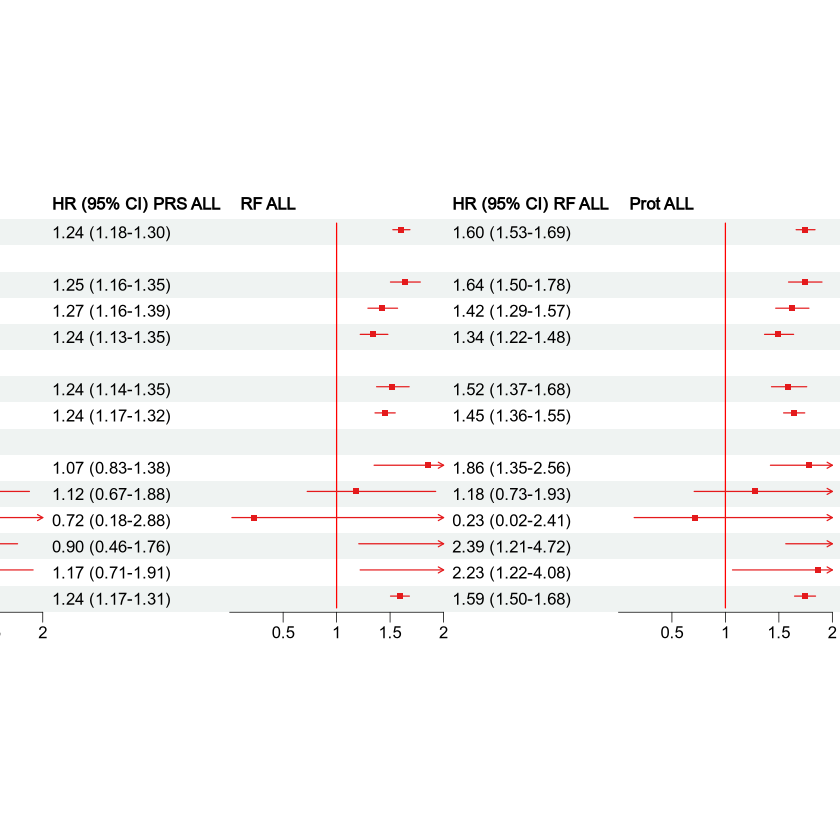

In [22]:



scores = lapply(HR_str_cols, function(x) {
  parts = strsplit(x, ") ")[[1]]  # 确保结果是字符向量
  if (length(parts) >= 2) {
    # 只有在有两个或更多部分时才执行
    paste(parts[length(parts)], sep = " ")
  } else {
    # 处理列名分割后不足两个部分的情况
    x
  }
})
scores <- unlist(scores)
scores

Cox_compared_df$Subgroup <- ifelse(is.na(Cox_compared_df[n_case_cols[1]]), 
                      Cox_compared_df$Subgroup,
                      paste0("   ", Cox_compared_df$Subgroup))
# Cox_compared_df

to_replace_na_cols <- c(HR_str_cols, n_case_cols)

# 循环遍历这些列
for (col in to_replace_na_cols) {
  # 检查Cox_compared_df的列名中是否包含指定的列名
  if (col %in% names(Cox_compared_df)) {
    # 使用ifelse和is.na来替换NA值为""
    Cox_compared_df[[col]] <- ifelse(is.na(Cox_compared_df[[col]]), "", Cox_compared_df[[col]])
  } else {
    warning(paste("Column", col, "not found in DataFrame."))
  }
}



to_show_cols = c("Subgroup")
to_show_cols_num = length(to_show_cols)


# ci_columns = seq(from = to_show_cols_num + 1, to = length(scores) + to_show_cols_num)
# to_show_cols = c(to_show_cols, scores)


total = c(scores, HR_str_cols)
for (i in 1:length(scores)) {
  to_show_cols = c(to_show_cols,scores[i], HR_str_cols[i])
}
ci_columns = seq(from = to_show_cols_num + 1, to = length(total) + to_show_cols_num, by = 2)
ci_columns



library(grid)
for (col in scores){
    Cox_compared_df[[col]] <- paste(rep(" ", 20), collapse = " ")
}


tm <- forest_theme(base_size = 10,
                   refline_gp  = gpar(col = "red"),
                   footnote_gp = gpar(col = "blue"),
                   legend_name = "Scores",
                   legend_value = c(scores)
                   )


est = as.list(Cox_compared_df[, HR_cols])
lower = as.list(Cox_compared_df[, HR_LCI_cols])
upper = as.list(Cox_compared_df[, HR_UCI_cols])

p <- forest(Cox_compared_df[,to_show_cols],
            est = est,
            lower =lower,
            upper = upper,
            ci_column = ci_columns,
            nudge_y = 0.1,
            # sizes = Cox_compared_df$se,
            ref_line = 1,
            # arrow_lab = c("Placebo Better", "Treatment Better"),
            xlim = c(0, 2),

            ticks_at = c(0.5, 1, 1.5, 2),
            # footnote = "This is the demo data. Please feel free to change\nanything you want.",
            theme = tm)

# 绘图

plot(p)
# png( 
#     filename = "name.png", # 文件名称
#     width = 30,            # 宽
#     height = 10,           # 高
#     units = "in",          # 单位
#     bg = "white",          # 背景颜色
#     res = 300)             # 分辨率
# # 2. 绘图
# plot(p)
# # 3. 关闭画布
# dev.off()



In [14]:



library(grid)
for (col in scores){
    Cox_compared_df[[col]] <- paste(rep(" ", 20), collapse = " ")
}


tm <- forest_theme(base_size = 10,
                   refline_gp  = gpar(col = "red"),
                   footnote_gp = gpar(col = "blue"),
                   legend_name = "Scores",
                   legend_value = c(scores)
                   )


est = as.list(Cox_compared_df[, HR_cols])
lower = as.list(Cox_compared_df[, HR_LCI_cols])
upper = as.list(Cox_compared_df[, HR_UCI_cols])

p <- forest(Cox_compared_df[,"Subgroup", "HR RF + PRS + Prot + Meta + SomaRF ALL"],
            est = est$`HR RF + PRS + Prot + Meta + SomaRF ALL`,
            lower =lower$`HR_LCI RF + PRS + Prot + Meta + SomaRF ALL`,
            upper = upper$`HR_UCI RF + PRS + Prot + Meta + SomaRF ALL`,
            ci_column = 2,
            nudge_y = 0.1,
            # sizes = Cox_compared_df$se,
            ref_line = 1,
            # arrow_lab = c("Placebo Better", "Treatment Better"),
            xlim = c(0, 2),

            ticks_at = c(0.5, 1, 1.5, 2),
            # footnote = "This is the demo data. Please feel free to change\nanything you want.",
            # theme = tm
            )

# 绘图

plot(p)

ERROR: Error in drop && length(xo) == 1L: invalid 'x' type in 'x && y'


In [18]:

p <- forest(Cox_compared_df[,to_show_cols],
            est = Cox_compared_df$`HR RF + PRS + Prot + Meta + SomaRF ALL`,
            lower =Cox_compared_df$`HR_LCI RF + PRS + Prot + Meta + SomaRF ALL`,
            upper = Cox_compared_df$`HR RF + PRS + Prot + Meta + SomaRF ALL`,
            ci_column = c(ci_columns),
            # nudge_y = 0.1,
            # sizes = Cox_compared_df$se,
            # ref_line = 1,
            # arrow_lab = c("Placebo Better", "Treatment Better"),
            # xlim = c(0, 2),
            # ticks_at = c(0.5, 1, 1.5, 2),
            # footnote = "This is the demo data. Please feel free to change\nanything you want.",
            # theme = tm
            )
plot(p)




ERROR: Error in grid.Call.graphics(C_setviewport, vp, TRUE): invalid 'layout.pos.col'


In [22]:
ci_columns

[1] 2

In [24]:


tm <- forest_theme(base_size = 10,  #文本的大小
                   # Confidence interval point shape, line type/color/width
                   ci_pch = 15,   # 可信区间点的形状
                   ci_col = "#762a83",    # CI的颜色
                   ci_fill = "blue",     # CI中se点的颜色填充
                   ci_alpha = 0.8,        # CI透明度
                   ci_lty = 1,            # CI的线型
                   ci_lwd = 1.5,          # CI的线宽
                   ci_Theight = 0.2, # Set an T end at the end of CI  CI的高度，默认是NULL
                   # Reference line width/type/color   参考线默认的参数，中间的竖的虚线
                   refline_lwd = 1,       #中间的竖的虚线
                   refline_lty = "dashed",
                   refline_col = "grey20",
                   # Vertical line width/type/color  垂直线宽/类型/颜色   可以添加一条额外的垂直线，如果没有就不显示
                   vertline_lwd = 1,              #可以添加一条额外的垂直线，如果没有就不显示
                   vertline_lty = "dashed",
                   vertline_col = "grey20",
                   # Change summary color for filling and borders   更改填充和边框的摘要颜色
                   summary_fill = "yellow",       #汇总部分大菱形的颜色
                   summary_col = "#4575b4",
                   # Footnote font size/face/color  脚注字体大小/字体/颜色
                   footnote_cex = 0.6,
                   footnote_fontface = "italic",
                   footnote_col = "red")



p <- forest(Cox_compared_df[,c("Subgroup", "HR (95% CI) Prot ALL", "n_case Prot ALL"," ")],
            est = Cox_compared_df$`HR Prot ALL`,
            lower = Cox_compared_df$`HR_LCI Prot ALL`,
            upper = Cox_compared_df$`HR_UCI Prot ALL`,
            ci_column = 4,
            # sizes = Cox_compared_df$se,
            ref_line = 1,
            # arrow_lab = c("Placebo Better", "Treatment Better"),
            xlim = c(0, 4),
            ticks_at = c(0.5, 1, 2, 3),
            # footnote = "This is the demo data. Please feel free to change\nanything you want.",
            # theme = tm
            )

# 绘图
plot(p)



refline_lwd, refline_lty, refline_col will be deprecated, use refline_gp instead.

footnote_cex, footnote_fontface, footnote_col will be deprecated, use footnote_gp instead.



ERROR: [1m[33mError[39m in `Cox_compared_df[, c("Subgroup", "HR (95% CI) Prot ALL", "n_case Prot ALL", " ")]`:[22m
[33m![39m Can't subset columns that don't exist.
[31m✖[39m Column ` ` doesn't exist.


### plot complex

In [22]:
library(grid)

Cox_compared_df$`ALL` <- paste(rep(" ", 20), collapse = " ")
Cox_compared_df$`10-years` <- paste(rep(" ", 20), collapse = " ")

tm <- forest_theme(base_size = 10,
                   refline_gp  = gpar(col = "red"),
                   footnote_gp = gpar(col = "blue"),
                   legend_name = "Group",
                   legend_value = c("Prot", "PRS")
                   )

p <- forest(Cox_compared_df[,c("Subgroup", "HR (95% CI) Prot ALL", "n_case Prot ALL","ALL", "10-years")],
            est = list(
                Cox_compared_df$`HR Prot ALL`,
                Cox_compared_df$`HR PRS ALL`,
                Cox_compared_df$`HR Prot 10_years`,
                Cox_compared_df$`HR PRS 10_years`
            ),
            lower = list(
                    Cox_compared_df$`HR_LCI Prot ALL`,
                Cox_compared_df$`HR_LCI PRS ALL`,
                                Cox_compared_df$`HR_LCI Prot 10_years`,
                Cox_compared_df$`HR_LCI PRS 10_years`
            ),
            upper = list(
                        Cox_compared_df$`HR_UCI Prot ALL`,
                Cox_compared_df$`HR_UCI PRS ALL`,
                                Cox_compared_df$`HR_UCI Prot 10_years`,
                Cox_compared_df$`HR_UCI PRS 10_years`
            ),


            ci_column = c(4, 5), 
nudge_y = 0.4,

            # sizes = Cox_compared_df$se,
            ref_line = 1,
            # arrow_lab = c("Placebo Better", "Treatment Better"),
            xlim = c(0, 2),
            ticks_at = c(0.5, 1, 1.5, 2),
            # footnote = "This is the demo data. Please feel free to change\nanything you want.",
            theme = tm)

# 绘图


plot(p)
png( 
    filename = "name.png", # 文件名称
    width = 10,            # 宽
    height = 10,           # 高
    units = "in",          # 单位
    bg = "white",          # 背景颜色
    res = 300)             # 分辨率
# 2. 绘图
plot(p)
# 3. 关闭画布
dev.off()



Warning message:
“Unknown or uninitialised column: `HR Prot 10_years`.”
Warning message:
“Unknown or uninitialised column: `HR PRS 10_years`.”
Warning message:
“Unknown or uninitialised column: `HR_LCI Prot 10_years`.”
Warning message:
“Unknown or uninitialised column: `HR_LCI PRS 10_years`.”
Warning message:
“Unknown or uninitialised column: `HR_UCI Prot 10_years`.”
Warning message:
“Unknown or uninitialised column: `HR_UCI PRS 10_years`.”


ERROR: Error in check_errors(data = data, est = est, lower = lower, upper = upper, : All the elements in estimate, lower and upper should have the same length


In [23]:
Cox_compared_df


Subgroup,HR (95% CI) RF + PRS + Prot + Meta + SomaRF ALL,HR RF + PRS + Prot + Meta + SomaRF ALL,HR_UCI RF + PRS + Prot + Meta + SomaRF ALL,HR_LCI RF + PRS + Prot + Meta + SomaRF ALL,n_case RF + PRS + Prot + Meta + SomaRF ALL,n_control RF + PRS + Prot + Meta + SomaRF ALL,c_index RF + PRS + Prot + Meta + SomaRF ALL,HR (95% CI) PRS ALL,HR PRS ALL,⋯,HR (95% CI) SomtRF ALL,HR SomtRF ALL,HR_UCI SomtRF ALL,HR_LCI SomtRF ALL,n_case SomtRF ALL,n_control SomtRF ALL,c_index SomtRF ALL,RF + PRS + Prot + Meta + SomaRF ALL,ALL,10-years
"<chr[,1]>",<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,⋯,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
ALL,1.84 (1.73-1.95),1.8353189,1.950415,1.7270143,516,8196,0.7235439,1.24 (1.18-1.30),1.2365476,⋯,1.11 (1.04-1.18),1.1064973,1.176352,1.0407910,516,8196,0.5499958,,,
age,,NA,NA,NA,,NA,NA,,NA,⋯,,NA,NA,NA,,NA,NA,,,
0-60,1.93 (1.74-2.15),1.9338584,2.150349,1.7391631,196,5048,0.7407661,1.25 (1.16-1.35),1.2496244,⋯,1.10 (1.00-1.22),1.1034117,1.219993,0.9979711,196,5048,0.5451030,,,
60-65,1.65 (1.48-1.85),1.6531191,1.851201,1.4762321,154,1949,0.6667022,1.27 (1.16-1.39),1.2696522,⋯,1.06 (0.95-1.19),1.0620294,1.189704,0.9480567,154,1949,0.5360404,,,
65-70,1.55 (1.38-1.74),1.5476086,1.736728,1.3790832,166,1199,0.6587896,1.24 (1.13-1.35),1.2376792,⋯,0.98 (0.88-1.09),0.9797465,1.091497,0.8794372,166,1199,0.4997664,,,
sex,,NA,NA,NA,,NA,NA,,NA,⋯,,NA,NA,NA,,NA,NA,,,
female,1.74 (1.54-1.97),1.7398401,1.970140,1.5364612,156,4533,0.6842513,1.24 (1.14-1.35),1.2417321,⋯,1.12 (1.00-1.25),1.1152735,1.248225,0.9964832,156,4533,0.5568811,,,
male,1.72 (1.60-1.86),1.7221057,1.855911,1.5979475,360,3663,0.7026579,1.24 (1.17-1.32),1.2414631,⋯,1.07 (1.00-1.15),1.0733395,1.154255,0.9980962,360,3663,0.5353378,,,
Ethnic,,NA,NA,NA,,NA,NA,,NA,⋯,,NA,NA,NA,,NA,NA,,,


In [14]:
Cox_compared_df[,c(1:8, 30)]

Subgroup,HR (95% CI) Prot ALL,HR Prot ALL,HR_UCI Prot ALL,HR_LCI Prot ALL,n_case Prot ALL,n_control Prot ALL,c_index Prot ALL,plot
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ALL,1.75 (1.66-1.84),1.7474876,1.837797,1.6616157,819,13165,0.6899428,
age,NA,NA,NA,NA,NA,NA,NA,
0-60,1.74 (1.59-1.90),1.7397631,1.902849,1.5906544,307,8020,0.6817252,
60-65,1.62 (1.47-1.78),1.6182609,1.780581,1.4707380,252,3127,0.6503575,
65-70,1.50 (1.37-1.64),1.4957955,1.637614,1.3662589,260,2018,0.6406158,
sex,NA,NA,NA,NA,NA,NA,NA,
female,1.59 (1.43-1.76),1.5872561,1.760091,1.4313933,252,7423,0.6393745,
male,1.64 (1.54-1.74),1.6400859,1.741666,1.5444300,567,5742,0.6779677,
Ethnic,NA,NA,NA,NA,NA,NA,NA,


In [43]:
Cox_compared_df <- arrow::read_feather("Cox_compared_df.feather")
Cox_compared_df[1, ]
Cox_compared_df <- Cox_compared_df %>%
    filter(label == "future_cad_time_months" & age_bin=="ALL")
Cox_compared_df

method,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,⋯,n_case,c_index,LOG10P,q_values,reject,markers,formatted_qval,label,age_bin,group
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<dbl>,<dbl>,<dbl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>
RF:zscore,0.3729144,1.45196,0.1012813,0.1744067,0.571422,1.19054,1.770783,0,3.681968,⋯,55,0.6343999,3.635561,0.0003857341,TRUE,**,2.31e-04,3_years_cad_month,0-60,base


method,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,⋯,n_case,c_index,LOG10P,q_values,reject,markers,formatted_qval,label,age_bin,group
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<dbl>,<dbl>,<dbl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>
RF:zscore,0.4723553,1.603767,0.02533932,0.42269111,0.5220194,1.526063,1.685428,0,18.641197,⋯,819,0.6790396,76.827190,2.126726e-77,TRUE,***,1.49e-77,future_cad_time_months,ALL,base
Prot:zscore,0.5581791,1.747488,0.02570897,0.50779043,0.6085678,1.661616,1.837797,0,21.711450,⋯,819,0.6899428,103.796069,5.331017e-104,TRUE,***,1.60e-104,future_cad_time_months,ALL,base
Meta:zscore,0.4166084,1.516808,0.02573597,0.36616679,0.4670500,1.442196,1.595281,0,16.187783,⋯,819,0.6530988,58.211090,7.688121e-59,TRUE,***,6.15e-59,future_cad_time_months,ALL,base
PRS:zscore,0.2123233,1.236548,0.02461345,0.16408183,0.2605648,1.178311,1.297663,0,8.626313,⋯,816,0.5834678,17.198174,7.040170e-18,TRUE,***,6.34e-18,future_cad_time_months,ALL,base
SomtRF:zscore,0.1011995,1.106497,0.03123447,0.03998104,0.1624179,1.040791,1.176352,0,3.239993,⋯,516,0.5499958,2.922514,1.195326e-03,TRUE,*,1.20e-03,future_cad_time_months,ALL,base
RF + PRS:zscore,0.5221203,1.685598,0.02560587,0.47193369,0.5723068,1.603091,1.772351,0,20.390650,⋯,789,0.6976070,91.693711,4.048734e-92,TRUE,***,2.02e-92,future_cad_time_months,ALL,+ PRS:zscore
RF + PRS + Prot:zscore,0.6057778,1.832677,0.02534909,0.55609453,0.6554611,1.743849,1.926030,0,23.897420,⋯,789,0.7188513,125.487065,1.628939e-125,TRUE,***,3.26e-126,future_cad_time_months,ALL,+ PRS + Prot:zscore
RF + PRS + Meta:zscore,0.5441571,1.723155,0.02593125,0.49333275,0.5949814,1.637765,1.812997,0,20.984607,⋯,789,0.7017526,97.042536,2.266755e-97,TRUE,***,9.07e-98,future_cad_time_months,ALL,+ PRS + Meta:zscore
RF + PRS + Prot + Meta:zscore,0.6092922,1.839129,0.02540637,0.55949658,0.6590877,1.749791,1.933028,0,23.981867,⋯,789,0.7191705,126.366573,4.299591e-126,TRUE,***,4.30e-127,future_cad_time_months,ALL,+ PRS + Prot + Meta:zscore


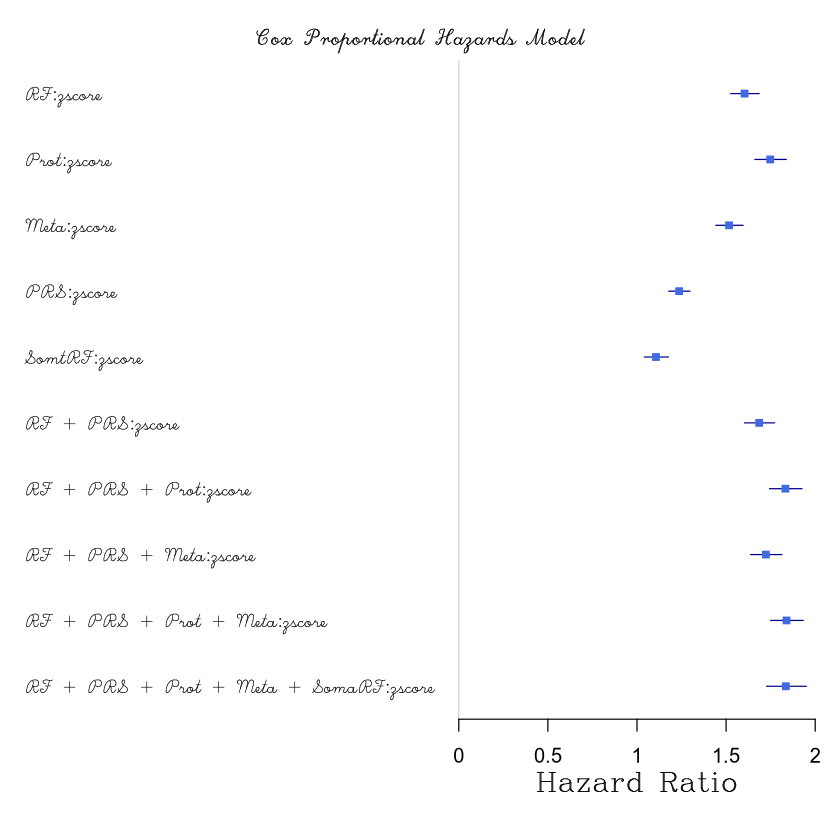

In [56]:


forestplot(
    labeltext = Cox_compared_df[, c("method", "group")],
    x= Cox_compared_df$method,
    mean = Cox_compared_df$`exp(coef)`,
    lower = Cox_compared_df$`exp(coef) lower 95%`,
    upper = Cox_compared_df$`exp(coef) upper 95%`,
    title = "Cox Proportional Hazards Model",
    xlab = "Hazard Ratio",
    # zero = 1,
    # clip = c(0.1, 10),
    boxsize = 0.1,
    col =  fpColors(box="royalblue",line="darkblue", summary="royalblue"),
    

    colgap = unit(1, "lines"),
    txt_gp = fpTxtGp(label = list(gpar(fontfamily = "HersheyScript"),
                                    gpar(fontfamily = "",
                                        col = "#660000")),
                    ticks = gpar(fontfamily = "", cex=1),
                    xlab  = gpar(fontfamily = "HersheySerif", cex = 1.5)),

)

In [12]:
?forestplot

forestplot             package:forestplot              R Documentation

_D_r_a_w_s _a _f_o_r_e_s_t _p_l_o_t

_D_e_s_c_r_i_p_t_i_o_n:

     This function generates a forest plot with extended capabilities
     compared to the default ‘forestplot()’ function in the ‘rmeta’
     package. It overcomes some limitations of the original function,
     including the addition of expressions, use of multiple confidence
     bands per label, autosizing to viewport, and uses modern tidyverse
     syntax. Refer to ‘vignette("forestplot")’ for comprehensive
     details.

_U_s_a_g_e:

     forestplot(...)
     
     ## S3 method for class 'data.frame'
     forestplot(x, mean, lower, upper, labeltext, is.summary, boxsize, ...)
     
     ## Default S3 method:
     forestplot(
       labeltext,
       mean,
       lower,
       upper,
       align = NULL,
       is.summary = FALSE,
       graph.pos = "right",
       hrzl_lines = NULL,
       clip = c(-Inf, Inf),
       

## Surv

In [ ]:

library(survival)
library(survminer)


my_data <- arrow::read_feather("for_surv.feather")
exractr_res <- function(x, round=3){ 
                        x <- summary(fit)
                        p.value<-round(x$wald["pvalue"], round)
                        wald.test<-round(x$wald["test"], round)
                        beta<-round(x$coef[1], round)
                        beta<-round(x$coef[1], round);#coeficient beta
                        HR <-round(x$coef[2], round);#exp(beta)

                        HR_LCI <- round(x$conf.int[,"lower .95"], round)
                        HR_UCI <- round(x$conf.int[,"upper .95"],round)

                        res<-c(beta, HR, HR_LCI, HR_UCI, wald.test, p.value)
                        names(res)<-c("beta", "HR", "HR_LCI", "HR_UCI", "wald.test", 
                            "p.value")
                        t(as.data.frame(res, check.names = FALSE))

                         }

In [ ]:
# 
for (xvar in c()


fit <- coxph(as.formula(paste('Surv(time, status)~', xvar)), data = my_data)
summary(fit)
ggsurvplot(survfit(fit), data = my_data, risk.table = TRUE, pval = TRUE,
        #   palette = c("#E7B800", "#2E9FDF"),
          conf.int = F,

        #   linetype="strata",
          fun="cumhaz"
          )


